El siguiente código utiliza el conjunto de datos "Financial Indicators of US stocks", para entrenar modelos de aprendizaje supervisado. Este conjunto de datos consiste en más de 200 indicadores financieros para distintas acciones, además de dos objetivos: clasificación (¿convenía comprar la acción?) y regresión (¿cuánto varió el precio de la acción?). Puede encontrar más información de este set de datos en: https://www.kaggle.com/cnic92/200-financial-indicators-of-us-stocks-20142018

In [ ]:
import pandas as pd
import numpy as np
import os
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [ ]:
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams.update({'font.size': 16})

In [ ]:
#https://drive.google.com/file/d/1b-3gnKTAzbZHRPHnnd5vd9ua9OSS3twI/view?usp=sharing
!gdown 1b-3gnKTAzbZHRPHnnd5vd9ua9OSS3twI

Downloading...
From: https://drive.google.com/uc?id=1b-3gnKTAzbZHRPHnnd5vd9ua9OSS3twI
To: /content/us_stocks_indicators.csv
100% 40.0M/40.0M [00:00<00:00, 86.7MB/s]


In [ ]:
df = pd.read_csv('us_stocks_indicators.csv')

# Contar cuántas filas tienen al menos un valor nulo
num_rows_with_na = df.isnull().any(axis=1).sum()
print(f'Número de filas con al menos un valor nulo: {num_rows_with_na}')

df


Número de filas con al menos un valor nulo: 0


,Year,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,Class,Price Var
0,2014,3.878567,-0.129934,1.790827,7.800696,-0.176558,9.122478,7.021603,7.492154,2.218515,...,-0.160494,-0.273101,-0.255555,-0.156224,-0.074997,-0.180232,-0.440493,3.0,1,5.339413
1,2014,0.200522,-0.108851,0.143151,0.275383,-0.176558,0.487538,0.290552,0.178611,-0.041877,...,-0.071844,-0.091054,-0.133905,-0.149948,-0.052301,-0.180232,-0.207595,3.0,1,18.603845
2,2014,0.432598,-0.105983,0.346556,0.498363,0.082470,0.500981,0.332736,0.710699,0.287607,...,-0.102809,0.037929,-0.351691,0.084760,-0.097541,-0.302438,-0.691079,3.0,1,22.628763
3,2014,0.528338,-0.085962,0.628055,0.089929,-0.176558,0.032375,-0.089120,0.427129,-0.296992,...,-0.081957,0.019561,-0.076142,-0.056113,-0.087647,-0.180232,-0.282402,3.0,1,58.666783
4,2014,5.767776,-0.118091,3.321925,9.931729,-0.176558,13.815935,10.011302,7.390123,4.497094,...,-0.143888,-0.322082,-0.483751,-0.268766,-0.090161,-0.180232,-0.360526,3.0,1,8.886701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11561,2018,-0.321902,-0.056913,-0.260997,-0.362659,-0.176558,-0.323253,-0.348420,-0.304556,-0.364943,...,-0.125742,-0.162893,-0.296377,-0.077211,-0.087938,-0.180232,-0.427595,5.0,1,11.671183
11562,2018,-0.320430,-0.063498,-0.260046,-0.360389,-0.176558,-0.318976,-0.345646,-0.303842,-0.362495,...,0.014435,0.037725,-0.239226,-0.070337,-0.094344,-0.180232,0.118168,3.0,0,-3.076927
11563,2018,-0.319299,-0.057232,-0.260687,-0.355165,-0.176558,-0.311366,-0.338340,-0.304045,-0.359536,...,-0.004627,-0.162893,-0.254331,-0.089822,-0.109306,-0.180232,-0.319253,2.0,1,27.118650
11564,2018,-0.322487,-0.338482,-0.260997,-0.364521,-0.166454,-0.322009,-0.345954,-0.314653,-0.364943,...,0.017639,-0.162893,-0.774404,-0.624742,-0.087647,-0.088512,-0.786892,0.0,0,-77.922077


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[:,:-2], df.iloc[:,-2], test_size=0.3, random_state=0) #Selecciona las dos ultimas filas como columna objetivo
#X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[-2, :], df.iloc[-2, :], test_size=0.3, random_state=0) #Selecciona solo la penultima fila como columna objetivo

In [ ]:
def train_and_test(model, X_train, Y_train, X_test, Y_test):
  model.fit(X_train, Y_train)
  predicted = model.predict(X_test)
  print(f'Confusion matrix:\n {metrics.confusion_matrix(Y_test, predicted)}')
  print(f'Accuracy: {metrics.accuracy_score(Y_test, predicted)}')

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=0)
train_and_test(model, X_train, Y_train, X_test, Y_test)

Confusion matrix:
 [[ 909  556]
 [ 463 1542]]
Accuracy: 0.7063400576368876


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=0)
train_and_test(model, X_train, Y_train, X_test, Y_test)

Confusion matrix:
 [[ 781  684]
 [ 514 1491]]
Accuracy: 0.6547550432276658


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=0)
train_and_test(model, X_train, Y_train, X_test, Y_test)

Confusion matrix:
 [[ 820  645]
 [ 669 1336]]
Accuracy: 0.6213256484149856


In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.8 MB/s eta 0:00:00


In [ ]:
import umap

um = umap.UMAP()
X_2d = um.fit_transform(X_train)

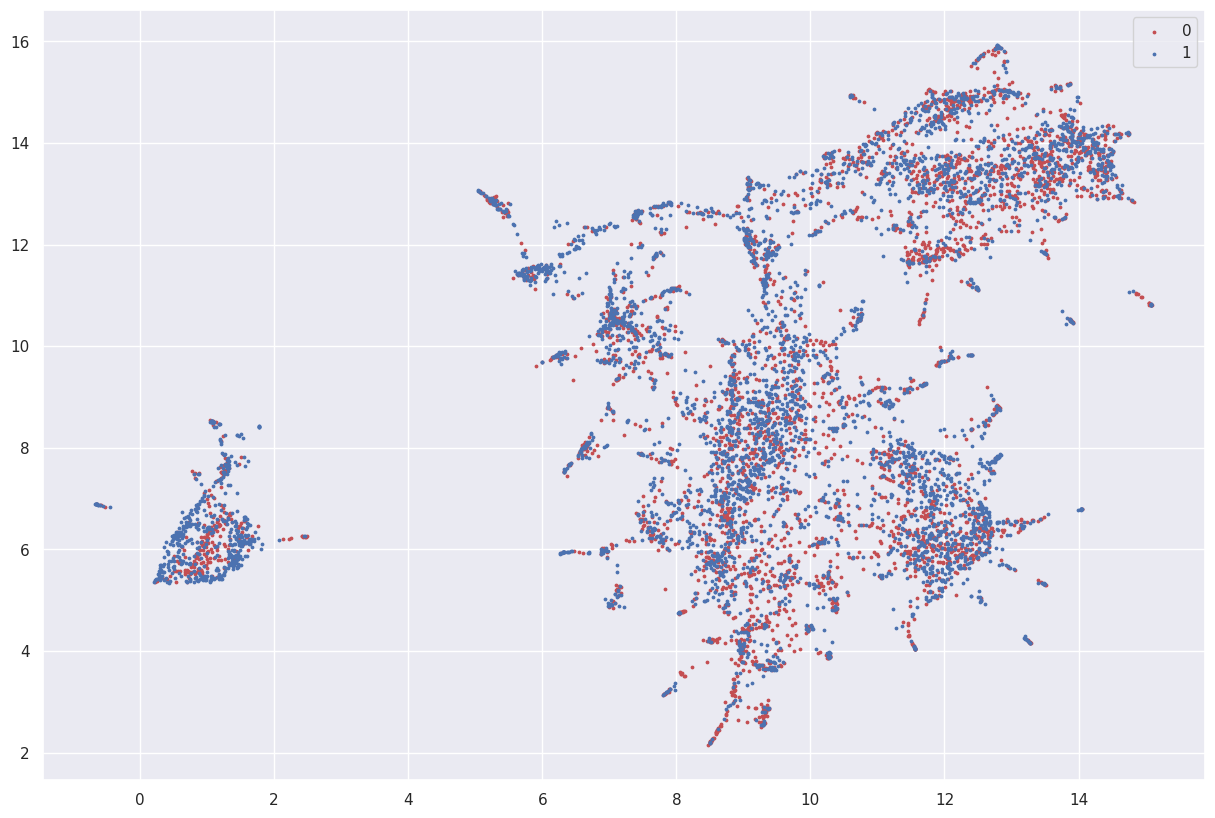

In [ ]:
plt.scatter(X_2d[Y_train == 0,0], X_2d[Y_train == 0,1], c='r', label = '0', s=3)
plt.scatter(X_2d[Y_train == 1,0], X_2d[Y_train == 1,1], c='b', label = '1', s=3)
plt.legend()
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
train_and_test(model, X_train, Y_train, X_test, Y_test)

Confusion matrix:
 [[ 685  780]
 [ 646 1359]]
Accuracy: 0.5890489913544669


In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=1)
train_and_test(model, X_train, Y_train, X_test, Y_test)

Confusion matrix:
 [[ 899  566]
 [ 519 1486]]
Accuracy: 0.6873198847262247


##**2A Evaluación de modelos**


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Cargar datos
#https://drive.google.com/file/d/1b-3gnKTAzbZHRPHnnd5vd9ua9OSS3twI/view?usp=sharing
!gdown 1b-3gnKTAzbZHRPHnnd5vd9ua9OSS3twI
df = pd.read_csv('us_stocks_indicators.csv')

# Separar características (X) y variable objetivo (Y)
X = df.drop(columns=['Price Var'])
Y = df['Price Var']

# Dividir datos en conjuntos de entrenamiento y prueba
# Como tenemos un conjunto de datos demasiado grande solo utilizaremos el 10% de los datos (test_size=0.1)
# Utilizamos random_state=0 para que nuestras pruebas sean replicables
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

# Definir el modelo de ensamblaje de regresión (Random Forest Regressor)
model = RandomForestRegressor(random_state=0)

# Definir los hiperparámetros a ajustar utilizando Grid Search Cross-Validation
# Realizaremos pruebas con 1, 2, 3, 4, 5 y 6 arboles de profundidad 5, 10 y 15 (en total 6*3=18 combinaciones diferentes de hiperparámetros)
param_grid = {'n_estimators': [1, 2, 3, 4, 5, 6],
              'max_depth': [5, 10, 15]}

#Usamos validacion cruzada con GridSearchCV donde cv=3 ya que nuestro data set es demasiado grande
#Dividimos el set de datos en 3 partes (cv=3) (18*3)
#Cada combinación de hiperparámetros se evaluará 3 veces, lo que significa que el modelo se ajustará y evaluará 18*3 = 54 veces
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)

# Obtener los mejores hiperparámetros encontrados
best_params = grid_search.best_params_

# Entrenar el modelo con los mejores hiperparámetros
best_model = RandomForestRegressor(**best_params, random_state=0)
best_model.fit(X_train, Y_train)

# Realizar predicciones en el conjunto de prueba
predictions = best_model.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

print(f'MSE: {mse}')
print(f'R²: {r2}')
print(f'Best Parameters: {best_params}')

Downloading...
From: https://drive.google.com/uc?id=1b-3gnKTAzbZHRPHnnd5vd9ua9OSS3twI
To: /content/us_stocks_indicators.csv
100% 40.0M/40.0M [00:00<00:00, 115MB/s] 
MSE: 787.7881482750173
R²: 0.5777090110437422
Best Parameters: {'max_depth': 5, 'n_estimators': 6}


#2B


In [ ]:
#https://drive.google.com/file/d/1b-3gnKTAzbZHRPHnnd5vd9ua9OSS3twI/view?usp=sharing
!gdown 1b-3gnKTAzbZHRPHnnd5vd9ua9OSS3twI

Downloading...
From: https://drive.google.com/uc?id=1b-3gnKTAzbZHRPHnnd5vd9ua9OSS3twI
To: /content/us_stocks_indicators.csv
100% 40.0M/40.0M [00:00<00:00, 196MB/s]


In [ ]:
df = pd.read_csv('us_stocks_indicators.csv')
df

,Year,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,Class,Price Var
0,2014,3.878567,-0.129934,1.790827,7.800696,-0.176558,9.122478,7.021603,7.492154,2.218515,...,-0.160494,-0.273101,-0.255555,-0.156224,-0.074997,-0.180232,-0.440493,3.0,1,5.339413
1,2014,0.200522,-0.108851,0.143151,0.275383,-0.176558,0.487538,0.290552,0.178611,-0.041877,...,-0.071844,-0.091054,-0.133905,-0.149948,-0.052301,-0.180232,-0.207595,3.0,1,18.603845
2,2014,0.432598,-0.105983,0.346556,0.498363,0.082470,0.500981,0.332736,0.710699,0.287607,...,-0.102809,0.037929,-0.351691,0.084760,-0.097541,-0.302438,-0.691079,3.0,1,22.628763
3,2014,0.528338,-0.085962,0.628055,0.089929,-0.176558,0.032375,-0.089120,0.427129,-0.296992,...,-0.081957,0.019561,-0.076142,-0.056113,-0.087647,-0.180232,-0.282402,3.0,1,58.666783
4,2014,5.767776,-0.118091,3.321925,9.931729,-0.176558,13.815935,10.011302,7.390123,4.497094,...,-0.143888,-0.322082,-0.483751,-0.268766,-0.090161,-0.180232,-0.360526,3.0,1,8.886701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11561,2018,-0.321902,-0.056913,-0.260997,-0.362659,-0.176558,-0.323253,-0.348420,-0.304556,-0.364943,...,-0.125742,-0.162893,-0.296377,-0.077211,-0.087938,-0.180232,-0.427595,5.0,1,11.671183
11562,2018,-0.320430,-0.063498,-0.260046,-0.360389,-0.176558,-0.318976,-0.345646,-0.303842,-0.362495,...,0.014435,0.037725,-0.239226,-0.070337,-0.094344,-0.180232,0.118168,3.0,0,-3.076927
11563,2018,-0.319299,-0.057232,-0.260687,-0.355165,-0.176558,-0.311366,-0.338340,-0.304045,-0.359536,...,-0.004627,-0.162893,-0.254331,-0.089822,-0.109306,-0.180232,-0.319253,2.0,1,27.118650
11564,2018,-0.322487,-0.338482,-0.260997,-0.364521,-0.166454,-0.322009,-0.345954,-0.314653,-0.364943,...,0.017639,-0.162893,-0.774404,-0.624742,-0.087647,-0.088512,-0.786892,0.0,0,-77.922077


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Suponiendo que 'df' es tu DataFrame y 'target_column' es el nombre de la columna que representa la variable objetivo
# Cambia 'target_column' al nombre real de tu variable objetivo

# Seleccionar características (X) y variable objetivo (Y)
X = df.drop(columns=['Price Var'])  # Elimina la columna de la variable objetivo
Y = df['Price Var']

# Crear un modelo de Random Forest Classifier
model = RandomForestClassifier()
model.fit(X, Y)

# Obtener la importancia de las características
feature_importances = model.feature_importances_

# Crear un DataFrame para visualizar las importancias de las características
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


ValueError: Unknown label type: 'continuous'

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Suponiendo que 'df' es tu DataFrame y 'target_column' es el nombre de la columna que representa la variable objetivo
# Cambia 'target_column' al nombre real de tu variable objetivo

# Seleccionar características (X) y variable objetivo (Y)
X = df.drop(columns=['Price Var'])  # Elimina la columna de la variable objetivo
Y = df['Price Var']

# Crear un modelo de Random Forest Regressor
model = RandomForestRegressor()
model.fit(X, Y)

# Obtener la importancia de las características
feature_importances = model.feature_importances_

# Crear un DataFrame para visualizar las importancias de las características
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


                   Feature  Importance
171                  Class    0.454005
122         Earnings Yield    0.020472
72       priceToSalesRatio    0.011179
108      Revenue per Share    0.009247
119   Price to Sales Ratio    0.008461
..                     ...         ...
66       Dividend payments    0.000812
24             EBIT Margin    0.000725
15     Preferred Dividends    0.000695
79          ebitperRevenue    0.000680
81   operatingProfitMargin    0.000000

[172 rows x 2 columns]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.preprocessing import StandardScaler

# Cargar datos
#https://drive.google.com/file/d/1b-3gnKTAzbZHRPHnnd5vd9ua9OSS3twI/view?usp=sharing
!gdown 1b-3gnKTAzbZHRPHnnd5vd9ua9OSS3twI
df = pd.read_csv('us_stocks_indicators.csv')

# Separar características (X) y variable objetivo (Y)
X = df.drop(columns=['Class'])
Y = df['Class']

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.1, random_state=0)

# Definir el modelo base k-NN
knn = KNeighborsClassifier()

# Definir el modelo de ensamblaje de clasificación (Bagging Classifier con k-NN)
bagging_model = BaggingClassifier(base_estimator=knn, n_estimators=10, random_state=0)

# Entrenar el modelo
bagging_model.fit(X_train, Y_train)

# Visualizar la superficie de clasificación en 2D

# Usaremos PCA para reducir a 2 dimensiones para la visualización
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train)

# Entrenar el modelo nuevamente en los datos reducidos a 2D
bagging_model_2D = BaggingClassifier(base_estimator=knn, n_estimators=10, random_state=0)
bagging_model_2D.fit(X_train_2D, Y_train)

# Crear una malla para la visualización de la superficie de decisión
x_min, x_max = X_train_2D[:, 0].min() - 1, X_train_2D[:, 0].max() + 1
y_min, y_max = X_train_2D[:, 1].min() - 1, X_train_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = bagging_model_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualizar la superficie de decisión
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train_2D[:, 0], X_train_2D[:, 1], c=Y_train, edgecolor='k', s=20)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Superficie de Clasificación del Modelo de Ensamble (Bagging con k-NN)')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


KeyboardInterrupt: 

Downloading...
From: https://drive.google.com/uc?id=1b-3gnKTAzbZHRPHnnd5vd9ua9OSS3twI
To: /content/us_stocks_indicators.csv
100% 40.0M/40.0M [00:00<00:00, 91.0MB/s]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


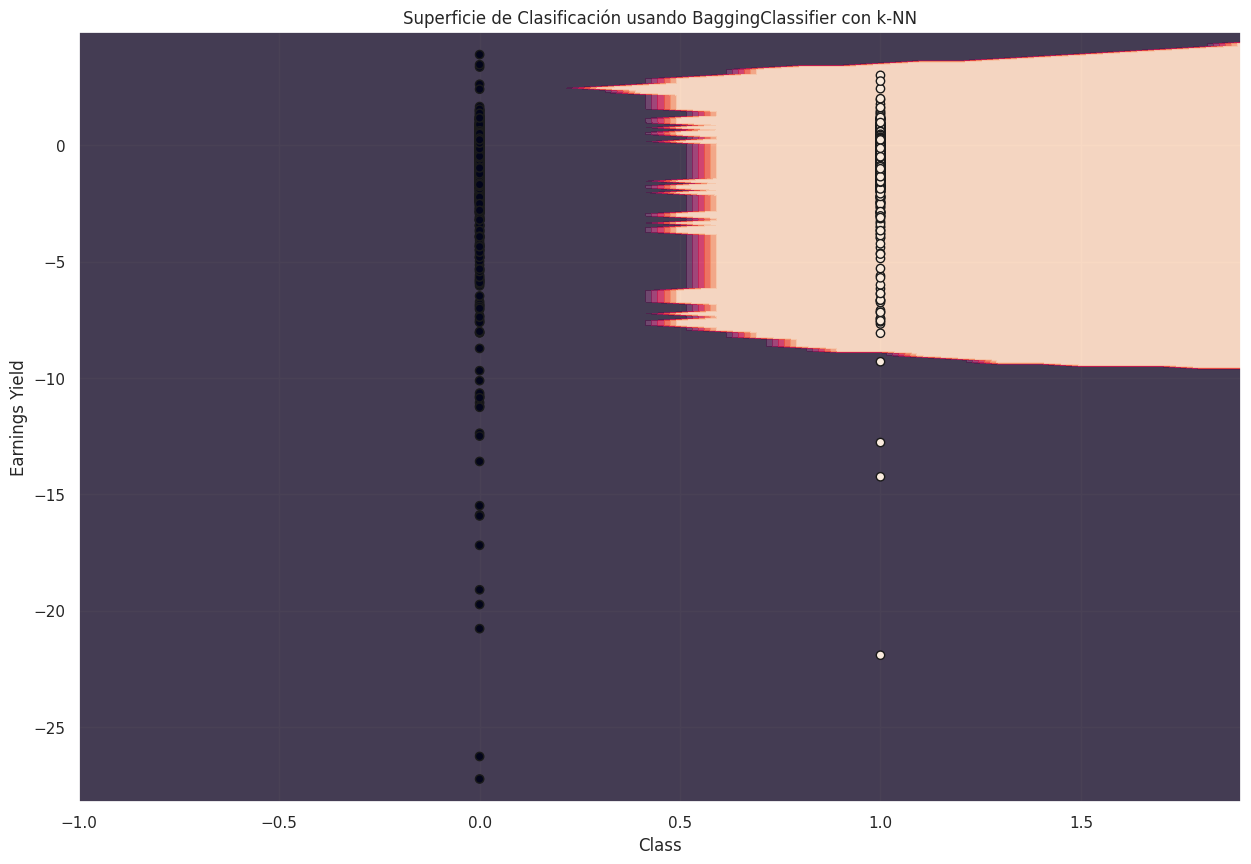

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt
import numpy as np


# Cargar datos
#https://drive.google.com/file/d/1b-3gnKTAzbZHRPHnnd5vd9ua9OSS3twI/view?usp=sharing
!gdown 1b-3gnKTAzbZHRPHnnd5vd9ua9OSS3twI

df = pd.read_csv('us_stocks_indicators.csv')
X = df[['Class', 'Earnings Yield', 'priceToSalesRatio']]  # Usamos las características más importantes según el resultado
Y = df['Class']

# Crear un clasificador k-NN como estimador base
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # Puedes ajustar el número de vecinos según sea necesario

# Crear el modelo de ensamble utilizando BaggingClassifier con el clasificador k-NN como estimador base
bagging_model = BaggingClassifier(estimator=knn_classifier, n_estimators=10, random_state=0)

# Entrenar el modelo de ensamble
bagging_model.fit(X, Y)

# Visualización de la Superficie de Clasificación en 2D
# Generar puntos para la visualización
x_min, x_max = X['Class'].min() - 1, X['Class'].max() + 1
y_min, y_max = X['Earnings Yield'].min() - 1, X['Earnings Yield'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predecir las clases para cada punto en la malla
Z = bagging_model.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel())])
Z = Z.reshape(xx.shape)

# Visualizar la superficie de clasificación
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X['Class'], X['Earnings Yield'], c=Y, edgecolors='k', marker='o')
plt.xlabel('Class')
plt.ylabel('Earnings Yield')
plt.title('Superficie de Clasificación usando BaggingClassifier con k-NN')
plt.show()


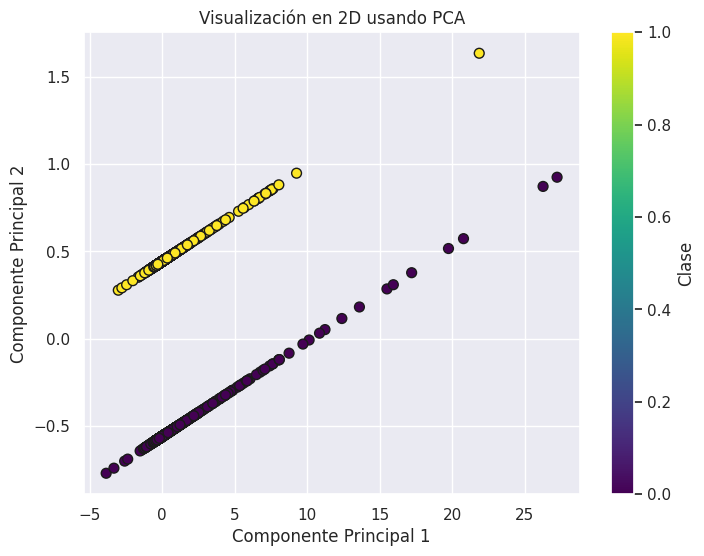

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_csv('us_stocks_indicators.csv')

# Seleccionar las dos características más importantes
X = df[['Class', 'Earnings Yield']]  # Usamos las características más importantes según el resultado

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test = train_test_split(X, test_size=0.3, random_state=0)

# Aplicar PCA para reducir la dimensionalidad a 2 componentes principales
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Crear un clasificador k-NN
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # Puedes ajustar el número de vecinos según sea necesario

# Entrenar el clasificador k-NN
knn_classifier.fit(X_train_pca, Y_train)

# Visualizar los resultados en 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=Y_train, cmap='viridis', edgecolors='k', s=50)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualización en 2D usando PCA')
plt.colorbar(label='Clase')
plt.show()


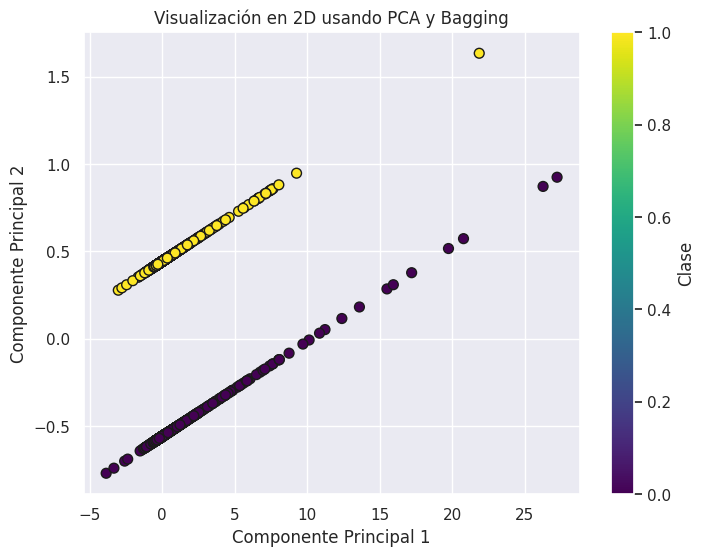

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_csv('us_stocks_indicators.csv')

# Seleccionar las dos características más importantes
X = df[['Class', 'Earnings Yield']]  # Usamos las características más importantes según el resultado
Y = df['Class']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Aplicar PCA para reducir la dimensionalidad a 2 componentes principales
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Crear un clasificador k-NN como estimador base
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # Puedes ajustar el número de vecinos según sea necesario

# Crear el modelo de ensamble utilizando BaggingClassifier con el clasificador k-NN como estimador base y PCA
bagging_model = BaggingClassifier(estimator=knn_classifier, n_estimators=10, random_state=0)
bagging_model.fit(X_train_pca, Y_train)

# Visualización de los resultados en 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=Y_train, cmap='viridis', edgecolors='k', s=50)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualización en 2D usando PCA y Bagging')
plt.colorbar(label='Clase')
plt.show()



#2B Buena

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import colormaps

In [ ]:
import pandas as pd
import numpy as np
import os
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [ ]:
#https://drive.google.com/file/d/1b-3gnKTAzbZHRPHnnd5vd9ua9OSS3twI/view?usp=sharing
!gdown 1b-3gnKTAzbZHRPHnnd5vd9ua9OSS3twI

Downloading...
From: https://drive.google.com/uc?id=1b-3gnKTAzbZHRPHnnd5vd9ua9OSS3twI
To: /content/us_stocks_indicators.csv
100% 40.0M/40.0M [00:00<00:00, 58.7MB/s]


In [ ]:
df = pd.read_csv('us_stocks_indicators.csv')

# Contar cuántas filas tienen al menos un valor nulo
num_rows_with_na = df.isnull().any(axis=1).sum()
print(f'Número de filas con al menos un valor nulo: {num_rows_with_na}')

df.head()

Número de filas con al menos un valor nulo: 0


,Year,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,Class,Price Var
0,2014,3.878567,-0.129934,1.790827,7.800696,-0.176558,9.122478,7.021603,7.492154,2.218515,...,-0.160494,-0.273101,-0.255555,-0.156224,-0.074997,-0.180232,-0.440493,3.0,1,5.339413
1,2014,0.200522,-0.108851,0.143151,0.275383,-0.176558,0.487538,0.290552,0.178611,-0.041877,...,-0.071844,-0.091054,-0.133905,-0.149948,-0.052301,-0.180232,-0.207595,3.0,1,18.603845
2,2014,0.432598,-0.105983,0.346556,0.498363,0.082470,0.500981,0.332736,0.710699,0.287607,...,-0.102809,0.037929,-0.351691,0.084760,-0.097541,-0.302438,-0.691079,3.0,1,22.628763
3,2014,0.528338,-0.085962,0.628055,0.089929,-0.176558,0.032375,-0.089120,0.427129,-0.296992,...,-0.081957,0.019561,-0.076142,-0.056113,-0.087647,-0.180232,-0.282402,3.0,1,58.666783
4,2014,5.767776,-0.118091,3.321925,9.931729,-0.176558,13.815935,10.011302,7.390123,4.497094,...,-0.143888,-0.322082,-0.483751,-0.268766,-0.090161,-0.180232,-0.360526,3.0,1,8.886701


In [ ]:
df_data = df.drop(columns=["Class"])
df_data.head()

,Year,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,Price Var
0,2014,3.878567,-0.129934,1.790827,7.800696,-0.176558,9.122478,7.021603,7.492154,2.218515,...,0.324440,-0.160494,-0.273101,-0.255555,-0.156224,-0.074997,-0.180232,-0.440493,3.0,5.339413
1,2014,0.200522,-0.108851,0.143151,0.275383,-0.176558,0.487538,0.290552,0.178611,-0.041877,...,1.303200,-0.071844,-0.091054,-0.133905,-0.149948,-0.052301,-0.180232,-0.207595,3.0,18.603845
2,2014,0.432598,-0.105983,0.346556,0.498363,0.082470,0.500981,0.332736,0.710699,0.287607,...,0.055565,-0.102809,0.037929,-0.351691,0.084760,-0.097541,-0.302438,-0.691079,3.0,22.628763
3,2014,0.528338,-0.085962,0.628055,0.089929,-0.176558,0.032375,-0.089120,0.427129,-0.296992,...,0.634279,-0.081957,0.019561,-0.076142,-0.056113,-0.087647,-0.180232,-0.282402,3.0,58.666783
4,2014,5.767776,-0.118091,3.321925,9.931729,-0.176558,13.815935,10.011302,7.390123,4.497094,...,0.266482,-0.143888,-0.322082,-0.483751,-0.268766,-0.090161,-0.180232,-0.360526,3.0,8.886701


In [ ]:
df_target = df['Class'].copy()
df_target.name = 'Class'
df_target.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

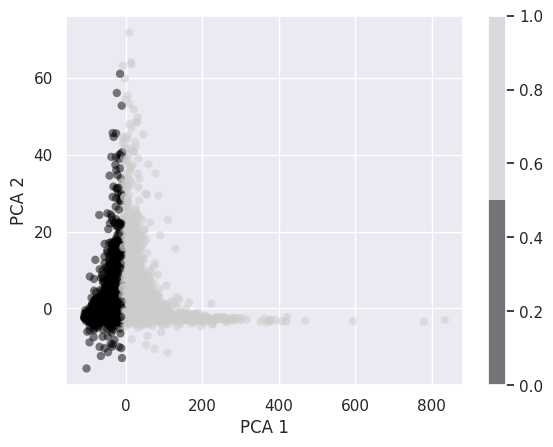

In [ ]:
from sklearn.decomposition import PCA


# Creamos nuestro objeto PCA y le indicamos cuántas dimensiones retornar
# (notar que se pueden mantener todos los componentes)
pca = PCA(n_components=2)
#projected = pca.fit_transform(df.iloc[:, 1:])
projected = pca.fit_transform(df_data)
plt.scatter(
    projected[:, 0],
    projected[:, 1],
    c=df_target,
    edgecolor="none",
    alpha=0.5,
    cmap=colormaps["nipy_spectral"].resampled(len(set(df_target))),
)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Haremos el split al mismo tiempo en las features y las etiquetas
# X_train, X_test, y_train, y_test
train_features, test_features, train_classes, test_classes = train_test_split(
    df_data, df_target, test_size=0.1, random_state=0
)

In [ ]:
train_features

,Year,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,Price Var
4041,2016,-0.320785,0.110159,-0.259360,-0.363254,-0.174002,-0.323330,-0.348245,-0.306554,-0.364745,...,-0.071247,-0.015241,-0.610866,-0.523552,-0.077988,-0.116516,-0.905132,-0.766992,6.0,36.000004
1669,2015,-0.296627,0.052220,-0.260997,-0.282270,0.507726,-0.304395,-0.205889,-0.368069,-0.168472,...,-0.071247,0.669034,0.034664,-0.317197,-0.250597,-0.084318,0.687981,2.695524,6.0,-22.454602
5280,2016,-0.307063,-0.014747,-0.260997,-0.315465,-0.176558,-0.263817,-0.298841,-0.273464,-0.364943,...,-0.071247,-0.125742,-0.162893,-0.268006,-0.032803,-0.099965,-0.180232,0.083159,5.0,-3.505972
641,2014,0.102130,-0.093610,0.216202,-0.222575,-0.176558,-0.133739,-0.199906,-0.214972,-0.307711,...,0.079097,-0.127864,-0.162893,-0.229225,-0.090718,-0.086078,-0.180232,-0.224915,7.0,1.749590
8242,2017,-0.263628,-0.074385,-0.251226,-0.202063,-0.007642,-0.065339,-0.125131,-0.308200,-0.359825,...,-0.071247,-0.027935,-0.162893,0.029179,0.003177,-0.087647,0.205930,-0.035132,9.0,11.490566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,2016,-0.312983,0.127100,-0.257445,-0.343290,-0.176558,-0.318048,-0.325867,-0.296216,-0.321206,...,-0.071247,0.103293,-0.162893,0.001624,-0.087371,-0.064529,-0.180232,0.986745,8.0,10.780580
3264,2015,-0.320080,-0.126057,-0.260155,-0.358999,-0.170076,-0.316581,-0.341926,-0.307457,-0.358899,...,-0.071247,-0.174770,7.208355,-0.338832,-0.225315,-0.099864,-0.382432,-0.167059,9.0,88.274342
9845,2018,-0.288202,-0.088989,-0.233735,-0.324522,-0.176558,-0.316532,-0.301037,-0.294109,-0.074981,...,-2.137276,0.051560,-0.162893,-0.142886,-0.225315,-0.064489,-0.180232,-0.877545,7.0,111.929278
10799,2018,-0.123170,-0.002904,-0.061814,-0.235043,-0.176558,-0.161839,-0.231297,-0.186502,-0.345099,...,0.351459,-0.019444,0.255691,0.120008,0.004671,-0.060436,-0.180232,-0.000861,7.0,15.653484


In [ ]:
test_features

,Year,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,Price Var
5452,2016,-0.315207,-0.083997,-0.260997,-0.341367,-0.176558,-0.288783,-0.323602,-0.295443,-0.363724,...,2.488520,-0.110925,-0.162893,-0.223510,-0.105003,-0.132826,-0.180232,0.050730,5.0,25.915739
9099,2018,0.805353,-0.114427,0.645834,0.925968,-0.176558,1.695302,1.125006,0.304439,-0.013737,...,-0.071247,-0.125742,-0.285754,-0.234940,-0.030771,-0.087616,-0.180232,-0.163374,2.0,51.967924
11522,2018,-0.320124,0.030393,-0.259906,-0.359770,-0.163266,-0.317847,-0.342314,-0.308813,-0.364105,...,-0.071247,0.561529,0.634070,1.262007,0.562304,-0.188202,0.185085,-0.228231,6.0,-53.421053
5178,2016,-0.294880,0.139208,-0.260997,-0.276715,-0.176558,-0.247953,-0.278492,-0.207103,-0.364943,...,-0.071247,-0.125742,-0.162893,-0.061038,0.192999,-0.127155,-0.180232,1.592574,5.0,-27.096778
5480,2016,0.261898,-0.124889,0.203642,0.317388,-0.176558,-0.324791,-0.025003,0.927616,1.961774,...,0.222032,-0.084746,-0.561681,-0.167175,-0.067528,-0.081694,-0.180232,-0.420962,10.0,17.279462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6676,2017,1.474974,-0.107045,1.108950,1.882837,-0.176558,2.654572,2.275660,0.643214,1.282480,...,0.478706,-0.125742,-0.285754,-0.305154,-0.102194,-0.089718,-0.180232,0.388654,2.0,21.887467
5536,2016,-0.292923,-0.122924,-0.229070,-0.351352,-0.176558,-0.298951,-0.302076,-0.366226,-0.112075,...,-0.071247,0.418689,1.511444,-0.002050,-0.324649,-0.065595,-0.180232,-0.615903,10.0,92.941834
2894,2015,-0.318607,0.050999,-0.260997,-0.352179,-0.176558,-0.310535,-0.338205,-0.296058,-0.364943,...,-0.071247,-0.125742,-0.162893,0.128173,-0.227526,-0.075178,-0.180232,0.293578,5.0,65.760670
8898,2018,0.402486,-0.112675,0.379795,0.318404,-0.176558,0.442491,0.178103,0.523107,0.483907,...,-0.299595,-0.121330,-0.029216,-0.241063,-0.112952,-0.060145,-0.180232,-0.610007,3.0,65.728748


In [ ]:
train_classes

4041     1
1669     0
5280     0
641      1
8242     1
        ..
4859     1
3264     1
9845     1
10799    1
2732     1
Name: Class, Length: 10409, dtype: int64

In [ ]:
test_classes

5452     1
9099     1
11522    0
5178     0
5480     1
        ..
6676     1
5536     1
2894     1
8898     1
1861     1
Name: Class, Length: 1157, dtype: int64

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics


# Definimos y ajustamos nuestro clasificador sobre los datos de entrenamiento
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(train_features, train_classes)

# Usamos el clasificador para predecir sobre los datos de test
predicted = classifier.predict(test_features)

expected = test_classes
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))
print()
print("Accuracy: %s" % metrics.balanced_accuracy_score(expected, predicted))

Confusion matrix:
[[475  16]
 [  9 657]]

Accuracy: 0.97694996422084


In [ ]:
K = 10
max_accuracy = 0
best_neighbors = 0
for n_neighbors in range(1, K + 1):
    print(f"Evaluando rendimiento para {n_neighbors} vecinos")
    # Definimos y ajustamos nuestro clasificador sobre los datos de entrenamiento
    classifier = KNeighborsClassifier(n_neighbors=n_neighbors).fit(
        train_features, train_classes
    )
    # Usamos el clasificador para predecir sobre los datos de test
    predicted = classifier.predict(test_features)
    accuracy = metrics.balanced_accuracy_score(expected, predicted)
    print(f"K={n_neighbors}: {accuracy:.2f}")
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_neighbors = n_neighbors
print(
    f"El mejor rendimiento se alcanza con {best_neighbors} vecinos "
    f"junto con un accuracy de {max_accuracy}."
)

Evaluando rendimiento para 1 vecinos
K=1: 0.98
Evaluando rendimiento para 2 vecinos
K=2: 0.97
Evaluando rendimiento para 3 vecinos
K=3: 0.98
Evaluando rendimiento para 4 vecinos
K=4: 0.98
Evaluando rendimiento para 5 vecinos
K=5: 0.99
Evaluando rendimiento para 6 vecinos
K=6: 0.99
Evaluando rendimiento para 7 vecinos
K=7: 0.99
Evaluando rendimiento para 8 vecinos
K=8: 0.99
Evaluando rendimiento para 9 vecinos
K=9: 0.99
Evaluando rendimiento para 10 vecinos
K=10: 0.99
El mejor rendimiento se alcanza con 9 vecinos junto con un accuracy de 0.9929236772413962.
